<a href="https://colab.research.google.com/github/Godofin/ChallengeAluraVoz-DataScience/blob/main/An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 2 - Análise dos dados

## 0 - Importando Bibliotecas

In [30]:
pip install python-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import sys
sys.path.append('../')

import pandas as pd
import seaborn as sns
import numpy as np  
import matplotlib.pyplot as plt

from plotly.express import box
import python_utils

In [10]:
data = pd.read_json("/content/Telco-Customer-Churn-limpeza.json")
data.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## 01 - Análise do churn

In [11]:
data.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Podemos observar que apenas 4 colunas podem ser analisadas com o método .describe(), então vamos utilizar o .dtypes para entender quais são os tipos de dados que temos dentro da nossa base de dados.

In [12]:
data.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object

Como podemos observar, a maior parte dos dados que temos é object, e o método não consegue trabalhar com variáveis categóricas a não ser que seja passado um parâmetro permitindo essa inclusão, porém algumas das nossas análises do método .describe() podem ser perdidas.

In [13]:
# Analisando features não categóricas

data.describe(include=[object])

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,0002-ORFBO,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


## 02 - Análise gráfica

Text(0.5, 1.0, 'Distribuição da variável Churn')

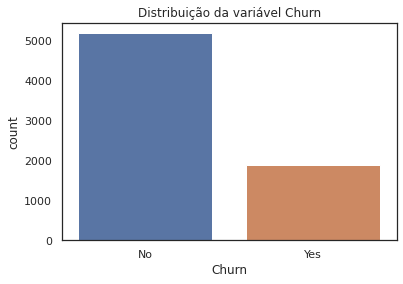

In [43]:
sns.set( style = "white" )

sns.countplot(data=data, x="Churn").set_title('Distribuição da variável Churn')

Text(0.5, 1.0, 'Distribuição da variável gênero por Churn')

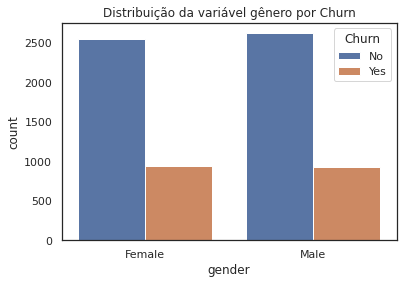

In [56]:
# Gráfico de Genero
sns.countplot(data=data, 
               x='gender',  
              hue='Churn',
    ).set_title("Distribuição da variável gênero por Churn")

Text(0.5, 1.0, 'Distribuição da variável InternetService por Churn')

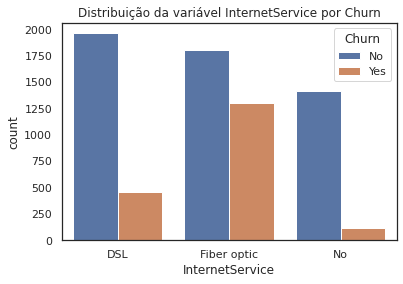

In [57]:
# Gráfico de internet

sns.countplot(data=data, 
               x='InternetService',
               hue='Churn'
    ).set_title("Distribuição da variável InternetService por Churn")

Text(0.5, 1.0, 'Distribuição da variável OnlineSecurity por Churn')

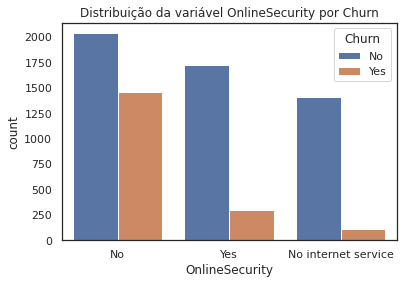

In [60]:
# Plotando o gráfico referente a se o cliente possui segurança online ou não

sns.countplot(data=data, 
               x='OnlineSecurity', 
               hue='Churn'
    ).set_title("Distribuição da variável OnlineSecurity por Churn")


Text(0.5, 1.0, 'Distribuição da variável OnlineBackup por Churn')

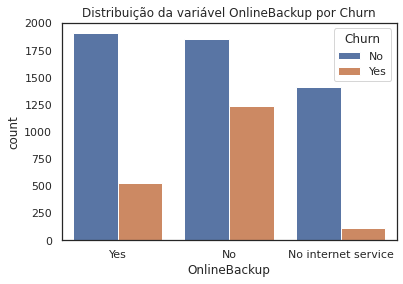

In [59]:
# Plotando o gráfico referente a se o cliente possui ou não um backup online

sns.countplot(data=data, 
               x='OnlineBackup', 
               hue='Churn'
    ).set_title("Distribuição da variável OnlineBackup por Churn")

Text(0.5, 1.0, 'Distribuição da variável TechSupport por Churn')

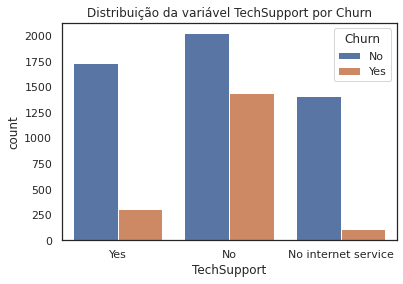

In [62]:
# Plotando o gráfico referente a se o cliente tem suporte técnico ou não.

sns.countplot(data=data, 
               x='TechSupport', 
               hue='Churn'
    ).set_title("Distribuição da variável TechSupport por Churn")

Text(0.5, 1.0, 'Distribuição da variável Contract por Churn')

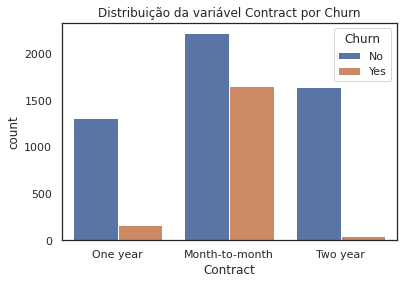

In [64]:
# Plotando o gráfico referente ao prazo do contrato do cliente
sns.countplot(data=data, 
               x='Contract', 
               hue='Churn',
).set_title("Distribuição da variável Contract por Churn")

Text(0.5, 1.0, 'Distribuição da variável PaymentMethod por Churn')

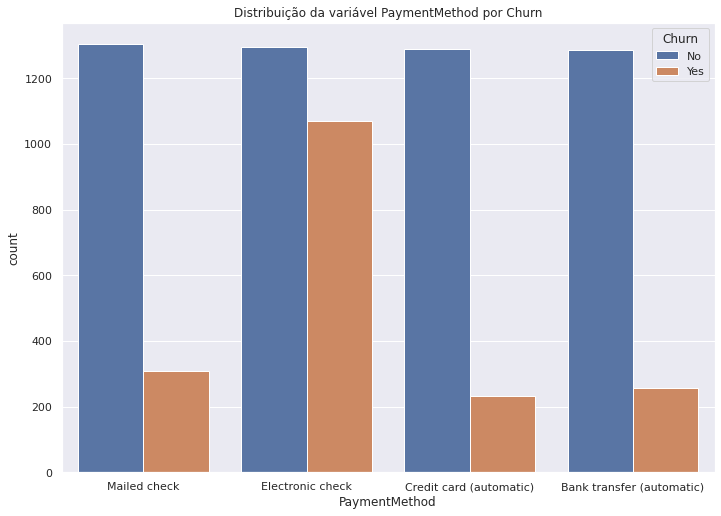

In [67]:
# Plotando o gráfico referente ao método de pagamento do cliente

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=data, 
               x='PaymentMethod',  
               hue='Churn', 
    ).set_title("Distribuição da variável PaymentMethod por Churn")